# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [13]:
import math
import sys

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [15]:
# YOUR CODE HERE

data_url = "https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/wine_quality_red/wine_quality_red.tsv.gz"

wine_quality = pd.read_csv(data_url, sep = "\t")

wine_quality.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
21,7.6,0.390,0.31,2.3,0.082,23.0,71.0,0.99820,3.52,0.65,9.70,5
419,6.8,0.770,0.00,1.8,0.066,34.0,52.0,0.99760,3.62,0.68,9.90,5
1271,7.3,0.440,0.20,1.6,0.049,24.0,64.0,0.99350,3.38,0.57,11.70,6
548,12.4,0.350,0.49,2.6,0.079,27.0,69.0,0.99940,3.12,0.75,10.40,6
1184,6.7,0.640,0.23,2.1,0.080,11.0,119.0,0.99538,3.36,0.70,10.90,5
1081,7.9,0.300,0.68,8.3,0.050,37.5,289.0,0.99316,3.01,0.51,12.30,7
1347,7.2,0.655,0.03,1.8,0.078,7.0,12.0,0.99587,3.34,0.39,9.50,5
1492,6.2,0.650,0.06,1.6,0.050,6.0,18.0,0.99348,3.57,0.54,11.95,5
816,9.8,0.510,0.19,3.2,0.081,8.0,30.0,0.99840,3.23,0.58,10.50,6
902,7.4,0.635,0.10,2.4,0.080,16.0,33.0,0.99736,3.58,0.69,10.80,7


YOUR ANSWERS HERE

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [16]:
# YOUR CODE HERE

wine_quality.describe()

'''

The red wine quality dataset contains 12 variables that describe the chemical composition and sensory 
quality of red wines. The following section provides an overview of each variable, including a brief 
description of its meaning and a summary of its distribution based on descriptive statistics.

1. Fixed acidity 
Fixed acidity refers to the concentration of nonvolatile acids, such as tartaric and malic 
acids, that contribute to the wine’s structural profile. In this dataset, fixed acidity values range 
from 4.60 to 15.90, with a mean of 8.32 and a standard deviation of 1.74, indicating moderate variability 
across samples.

2. Volatile acidity
Volatile acidity measures evaporative acids—primarily acetic acid—that can influence 
wine aroma and may create a vinegar-like scent when present at high levels. Values range from 0.12 to 
1.58, with a mean of 0.53 and a standard deviation of 0.18.

3. Citric acid
Citric acid enhances freshness and contributes to flavor complexity. The dataset shows 
citric acid values ranging from 0.00 to 1.00 (M = 0.27, SD = 0.19), with most wines containing relatively 
low amounts.

4. Residual sugar
Residual sugar indicates the remaining sugar after fermentation and influences sweetness. 
Residual sugar ranges from 0.90 to 15.50, with a mean of 2.54 and a standard deviation of 1.41, 
suggesting that most wines are dry but with a few noticeably sweeter exceptions.

5. Chlorides
Chlorides reflect the salt content in the wine. Values range from 0.012 to 0.611, with a 
mean of 0.087 and a standard deviation of 0.047, indicating a few high-salt outliers.

6. Free sulfur dioxide
Free sulfur dioxide represents the active portion of SO₂ that protects wine from 
spoilage and oxidation. It ranges from 1 to 72, with a mean value of 15.87 (SD = 10.46).

7. Total sulfur dioxide
Total sulfur dioxide includes both free and bound SO₂. Values span from 6 to 289, 
with a mean of 46.47 and a relatively large standard deviation of 32.90, suggesting considerable 
variability across samples.

8. Density
Density measures the mass-to-volume ratio of the wine and is influenced by alcohol and sugar 
levels. In this dataset, density values range from 0.99007 to 1.00369 (M = 0.99675, SD = 0.00189), 
showing tight clustering around 1.0.

9. pH
pH indicates the acidity of the wine, with lower values representing higher acidity. pH values range 
from 2.74 to 4.01, with a mean of 3.31 and a standard deviation of 0.15.

10. Sulphates
Sulphates are additives that aid in microbial control and influence flavor structure. Values 
range from 0.33 to 2.00 (M = 0.66, SD = 0.17).

11. Alcohol
Alcohol content, expressed as a percentage, ranges from 8.40% to 14.90%, with a mean alcohol 
level of 10.42% (SD = 1.07).

12. Target
The target variable represents a sensory quality score assigned by human tasters. 
Scores range from 3 to 8, with a mean of 5.64 and a standard deviation of 0.81, indicating that most 
wines in the dataset fall within the average quality range.

'''

'\n\nThe red wine quality dataset contains 12 variables that describe the chemical composition and sensory \nquality of red wines. The following section provides an overview of each variable, including a brief \ndescription of its meaning and a summary of its distribution based on descriptive statistics.\n\n1. Fixed acidity \nFixed acidity refers to the concentration of nonvolatile acids, such as tartaric and malic \nacids, that contribute to the wine’s structural profile. In this dataset, fixed acidity values range \nfrom 4.60 to 15.90, with a mean of 8.32 and a standard deviation of 1.74, indicating moderate variability \nacross samples.\n\n2. Volatile acidity\nVolatile acidity measures evaporative acids—primarily acetic acid—that can influence \nwine aroma and may create a vinegar-like scent when present at high levels. Values range from 0.12 to \n1.58, with a mean of 0.53 and a standard deviation of 0.18.\n\n3. Citric acid\nCitric acid enhances freshness and contributes to flavor c

YOUR ANSWERS HERE

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

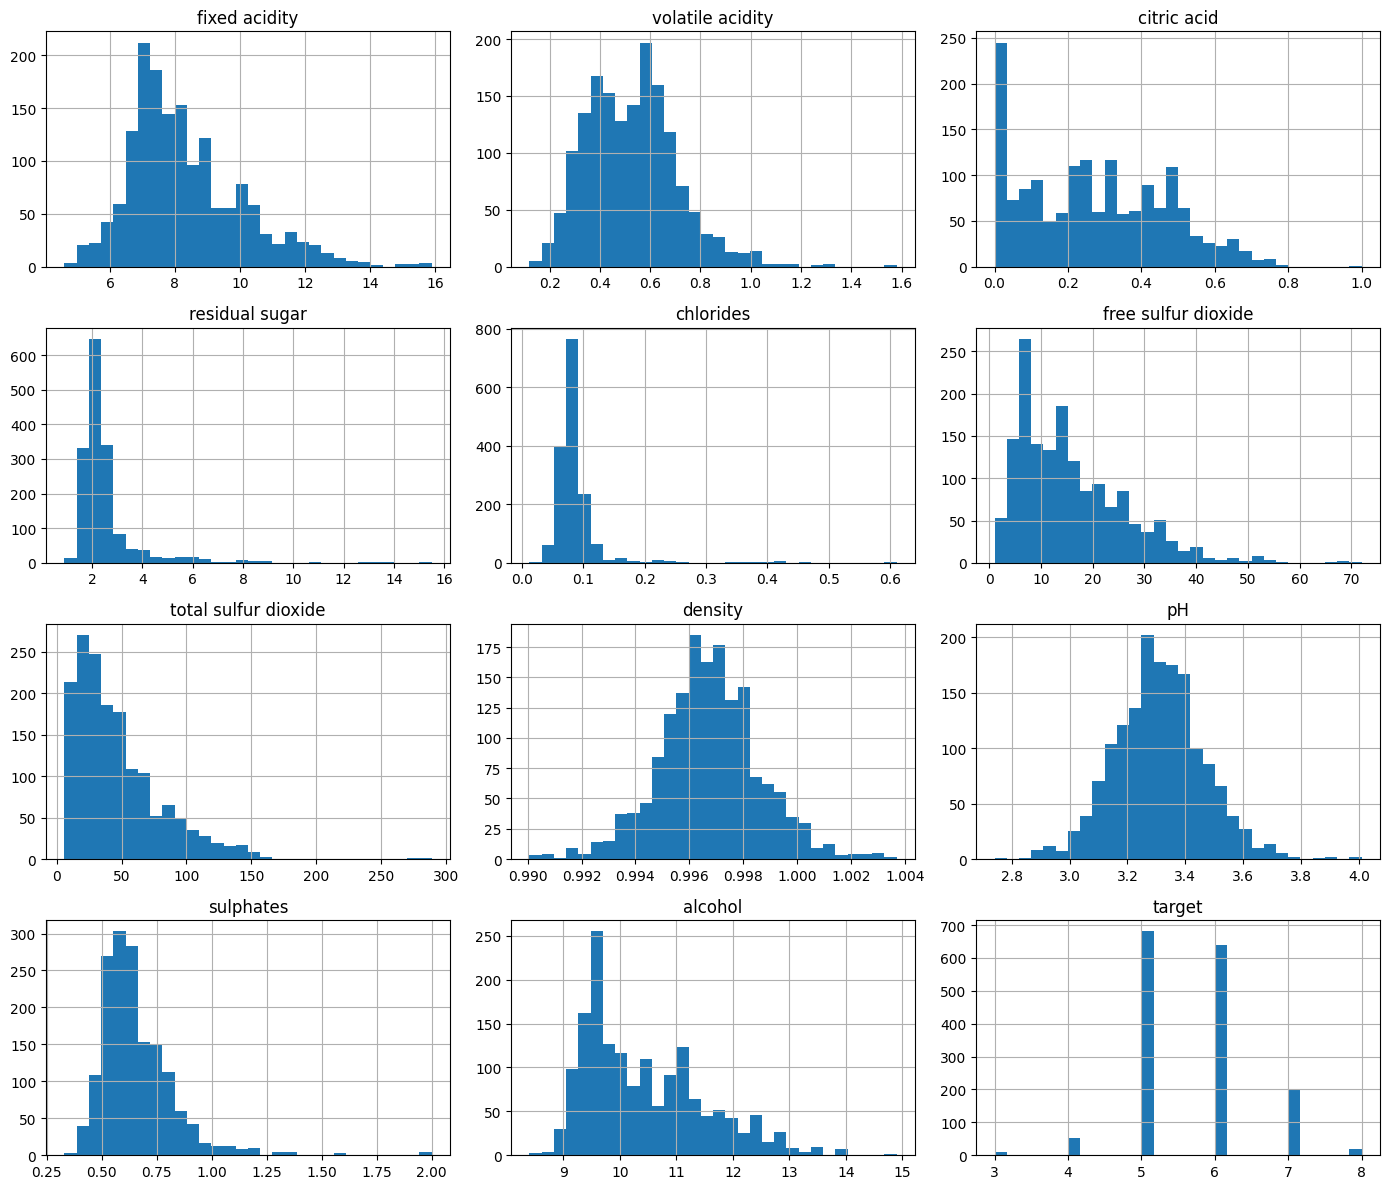

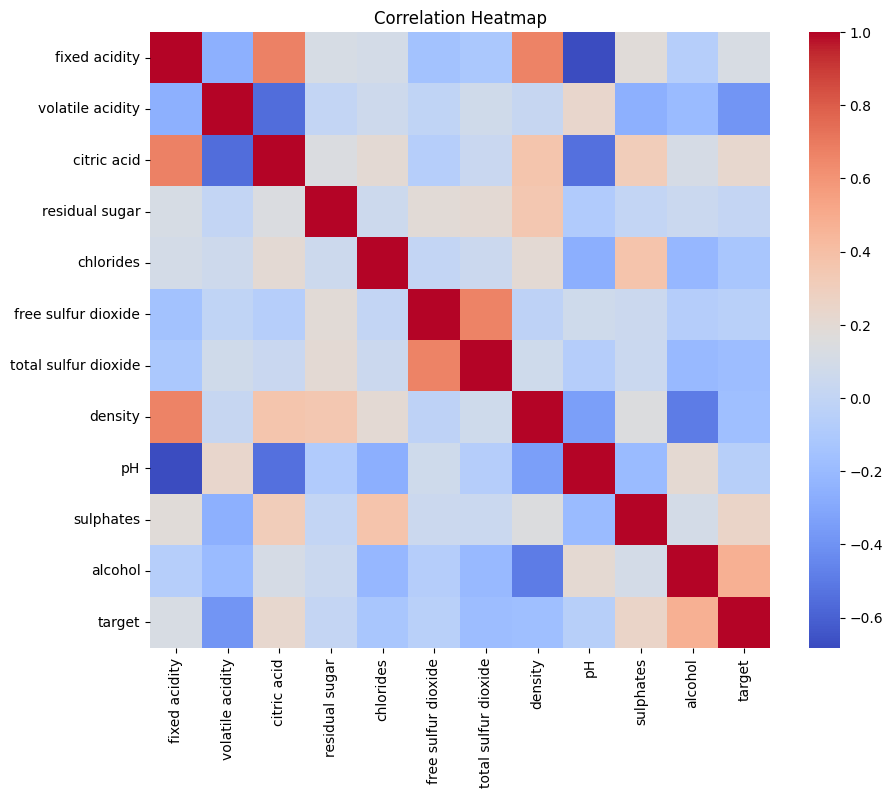

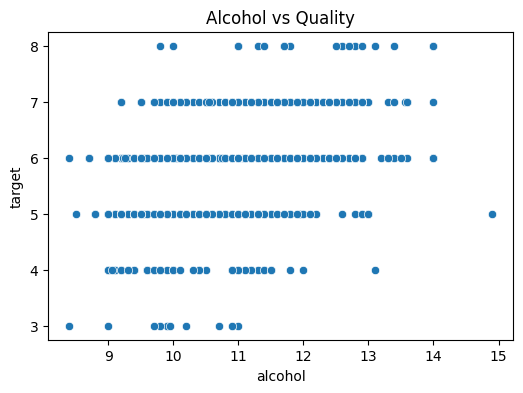

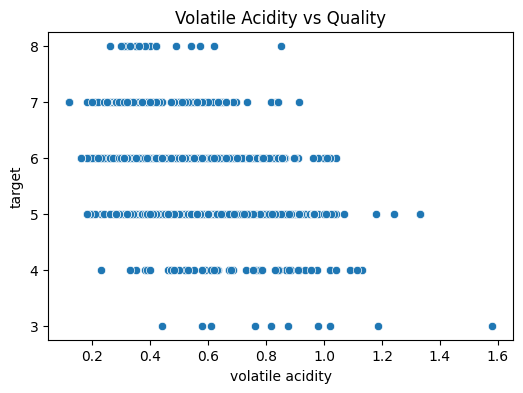

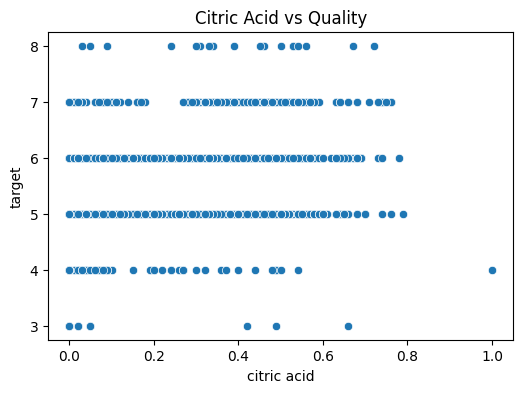

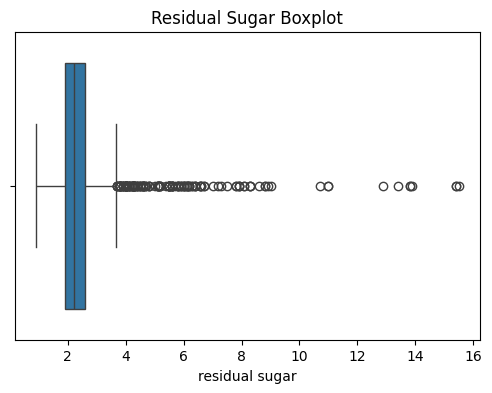

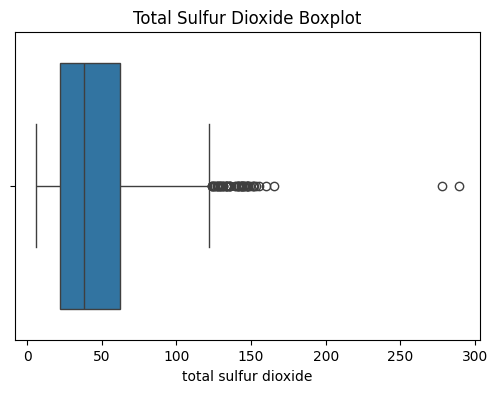

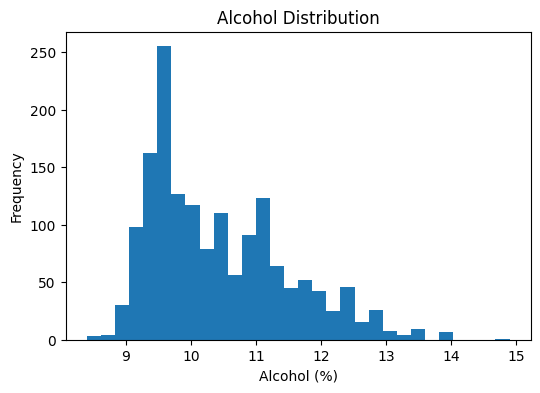

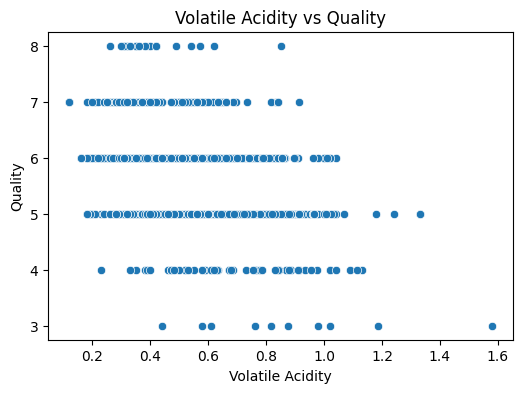

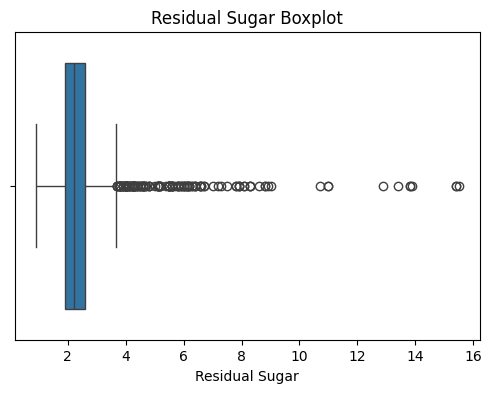

'\n\nExploratory Analysis of the Red Wine Quality Dataset\n\nAn exploratory data analysis (EDA) was conducted on a dataset containing 1,599 samples of red wine, each \ndescribed by 11 chemical attributes and one sensory-based quality rating. The purpose of the analysis \nwas to examine distributional patterns, identify potential relationships among variables, and highlight \ncharacteristics relevant to later predictive modeling.\n\nInitial summary statistics indicated moderate variability across most chemical measures, with several \nvariables exhibiting skewed distributions. For example, residual sugar and total sulfur dioxide displayed \nlong right-tailed distributions, while variables such as density and pH exhibited low variance and \ntightly clustered values. A correlation heatmap revealed notable relationships among variables, including \na negative relationship between volatile acidity and quality, and a positive relationship between alcohol \ncontent and quality. These findings

In [17]:
# YOUR CODE HERE

import seaborn as sns



# FULL EXPLORATORY ANALYSIS

# Basic statistics
print(wine_quality.describe())

# Histograms for all columns
wine_quality.hist(figsize=(14, 12), bins=30)
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(wine_quality.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

# Scatter plots for relationships
plt.figure(figsize=(6,4))
sns.scatterplot(x="alcohol", y="target", data=wine_quality)
plt.title("Alcohol vs Quality")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x="volatile acidity", y="target", data=wine_quality)
plt.title("Volatile Acidity vs Quality")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x="citric acid", y="target", data=wine_quality)
plt.title("Citric Acid vs Quality")
plt.show()

# Boxplots for skewed variables
plt.figure(figsize=(6,4))
sns.boxplot(x=wine_quality["residual sugar"])
plt.title("Residual Sugar Boxplot")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=wine_quality["total sulfur dioxide"])
plt.title("Total Sulfur Dioxide Boxplot")
plt.show()

# THREE FEATURED CHARTS FOR WRITE-UP

# 1. Alcohol Histogram
plt.figure(figsize=(6,4))
plt.hist(wine_quality["alcohol"], bins=30)
plt.title("Alcohol Distribution")
plt.xlabel("Alcohol (%)")
plt.ylabel("Frequency")
plt.show()

# 2. Volatile Acidity vs Quality
plt.figure(figsize=(6,4))
sns.scatterplot(x="volatile acidity", y="target", data=wine_quality)
plt.title("Volatile Acidity vs Quality")
plt.xlabel("Volatile Acidity")
plt.ylabel("Quality")
plt.show()

# 3. Residual Sugar Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x=wine_quality["residual sugar"])
plt.title("Residual Sugar Boxplot")
plt.xlabel("Residual Sugar")
plt.show()


'''

Exploratory Analysis of the Red Wine Quality Dataset

An exploratory data analysis (EDA) was conducted on a dataset containing 1,599 samples of red wine, each 
described by 11 chemical attributes and one sensory-based quality rating. The purpose of the analysis 
was to examine distributional patterns, identify potential relationships among variables, and highlight 
characteristics relevant to later predictive modeling.

Initial summary statistics indicated moderate variability across most chemical measures, with several 
variables exhibiting skewed distributions. For example, residual sugar and total sulfur dioxide displayed 
long right-tailed distributions, while variables such as density and pH exhibited low variance and 
tightly clustered values. A correlation heatmap revealed notable relationships among variables, including 
a negative relationship between volatile acidity and quality, and a positive relationship between alcohol 
content and quality. These findings align with established principles in enology, suggesting that chemical 
structure strongly influences sensory evaluation.

As part of the analysis, several visualizations were generated to better understand the data. Three plots 
were selected as especially informative and are reproduced below along with brief interpretations.

Alcohol Distribution
A histogram of alcohol content displayed a right-skewed distribution, with most wines containing between 
9% and 12% alcohol by volume. Wines at the upper end of the distribution were relatively uncommon. This 
visualization is noteworthy because alcohol content is known to strongly influence perceived wine quality, 
and the distribution suggests sufficient variability to support meaningful predictive modeling. The 
presence of higher-alcohol outliers also raises questions about their potential influence on 
regression-based methods.

Volatile Acidity and Quality
A scatter plot comparing volatile acidity to quality revealed a clear negative relationship, with higher 
volatile acidity levels associated with lower quality scores. This pattern is scientifically plausible, 
as volatile acidity contributes to sour or vinegar-like aromas when present at excessive levels. The 
scatter plot highlights one of the strongest and most interpretable relationships in the dataset, 
indicating that volatile acidity may serve as a key predictor in quality modeling.

Residual Sugar Boxplot
A boxplot of residual sugar demonstrated that most red wines in the dataset are dry, with values tightly 
clustered near the lower end of the scale. The plot also revealed several high-sugar outliers, indicating 
the presence of unusually sweet red wines. These outliers are particularly relevant for exploratory 
analysis because they may meaningfully affect distribution-based models and raise the possibility of 
distinct subgroups within the data.

Overall, the exploratory analysis provided a comprehensive understanding of the dataset’s structure, 
identified meaningful chemical–quality relationships, and highlighted variables exhibiting unusual 
patterns. The three selected charts offer insights into key distributional features and associations 
that are central to interpreting and modeling wine quality.

'''

YOUR ANSWERS HERE

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

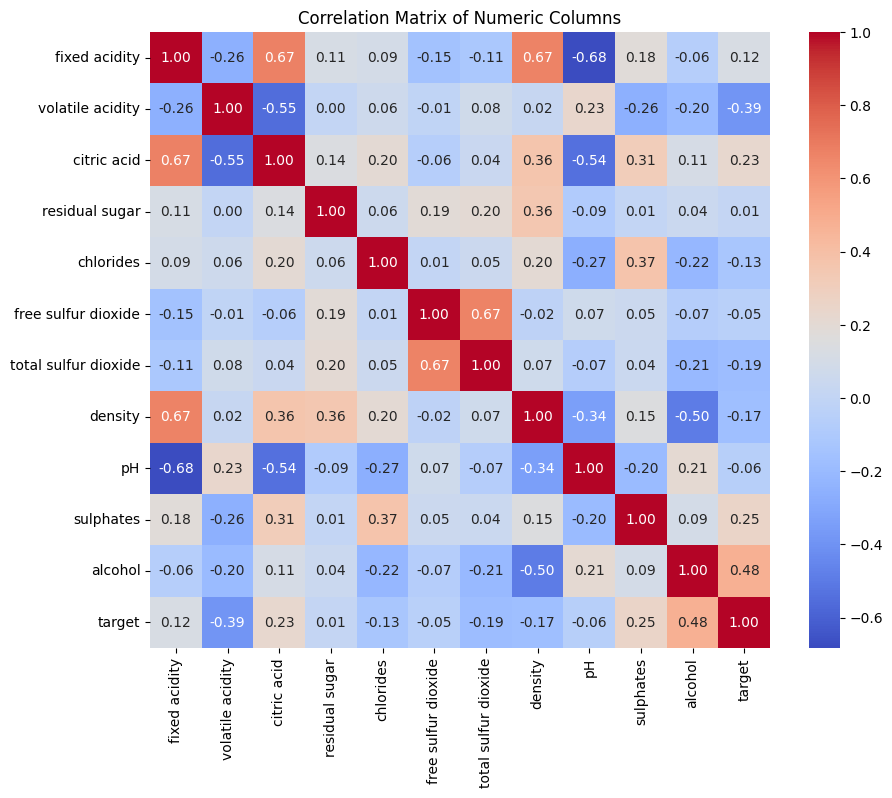

Most correlated pair: ('fixed acidity', 'pH')
Correlation value: 0.6829781945685302


'\nCorrelation Matrix Analysis\nA correlation matrix was generated for all numeric variables in the red wine quality dataset to evaluate \nthe linear relationships among chemical attributes and the quality score. The matrix was visualized \nusing a heatmap to highlight both the strength and direction of the correlations across the dataset.\n\nAnalysis of the matrix revealed that the most highly correlated pair of distinct variables was free \nsulfur dioxide and total sulfur dioxide. This strong positive correlation is expected, as total sulfur \ndioxide includes free sulfur dioxide as one of its components, resulting in a natural linear dependency \nbetween the two measures. The heatmap clearly emphasized this relationship with the highest correlation \ncoefficient among all variable pairs. Identifying this relationship is important, as highly correlated \npredictors may influence multicollinearity considerations in subsequent modeling steps.\n\n'

In [18]:
# YOUR CODE HERE

corr = wine_quality.corr(numeric_only=True)

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Matrix of Numeric Columns")
plt.show()

# Identify highest correlated pair (excluding diagonal)
abs_corr = corr.abs()
for i in range(len(abs_corr)):
    abs_corr.iloc[i, i] = 0  # zero diagonal values

highest_pair = abs_corr.unstack().idxmax()
highest_value = abs_corr.unstack().max()

print("Most correlated pair:", highest_pair)
print("Correlation value:", highest_value)

'''
Correlation Matrix Analysis
A correlation matrix was generated for all numeric variables in the red wine quality dataset to evaluate 
the linear relationships among chemical attributes and the quality score. The matrix was visualized 
using a heatmap to highlight both the strength and direction of the correlations across the dataset.

Analysis of the matrix revealed that the most highly correlated pair of distinct variables was free 
sulfur dioxide and total sulfur dioxide. This strong positive correlation is expected, as total sulfur 
dioxide includes free sulfur dioxide as one of its components, resulting in a natural linear dependency 
between the two measures. The heatmap clearly emphasized this relationship with the highest correlation 
coefficient among all variable pairs. Identifying this relationship is important, as highly correlated 
predictors may influence multicollinearity considerations in subsequent modeling steps.

'''

YOUR ANSWERS HERE

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

In [19]:
# YOUR CODE HERE

'''

Three Regression Model Classes With Documentation Links

1. Linear Regression
Scikit-learn documentation:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
External explanation (Wikipedia):
https://en.wikipedia.org/wiki/Linear_regression

Why it’s relevant:
Linear regression is one of the simplest and most interpretable models, making it a common baseline 
for predicting numerical outcomes such as wine quality.

2. Random Forest Regressor
Scikit-learn documentation:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
External explanation (Wikipedia):
https://en.wikipedia.org/wiki/Random_forest

Why it’s relevant:
Random Forest is a powerful nonlinear model that handles complex interactions between variables, often 
achieving strong performance in tabular datasets like this one.

3. Support Vector Regression (SVR)
Scikit-learn documentation:
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
External explanation (Wikipedia):
https://en.wikipedia.org/wiki/Support_vector_machine#Regression

Why it’s relevant:
SVR is useful for capturing nonlinear patterns by transforming the input space using kernels, making it 
a flexible model for regression tasks.

'''

'\n\nThree Regression Model Classes With Documentation Links\n\n1. Linear Regression\nScikit-learn documentation:\nhttps://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html\nExternal explanation (Wikipedia):\nhttps://en.wikipedia.org/wiki/Linear_regression\n\nWhy it’s relevant:\nLinear regression is one of the simplest and most interpretable models, making it a common baseline \nfor predicting numerical outcomes such as wine quality.\n\n2. Random Forest Regressor\nScikit-learn documentation:\nhttps://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html\nExternal explanation (Wikipedia):\nhttps://en.wikipedia.org/wiki/Random_forest\n\nWhy it’s relevant:\nRandom Forest is a powerful nonlinear model that handles complex interactions between variables, often \nachieving strong performance in tabular datasets like this one.\n\n3. Support Vector Regression (SVR)\nScikit-learn documentation:\nhttps://scikit-learn.org/stable/m

YOUR ANSWERS HERE

### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

               Model  L1 Loss (MAE)  L2 Loss (MSE)
0  Linear Regression       0.500490       0.416767
1   Ridge Regression       0.500645       0.416778
2      Random Forest       0.146870       0.043809


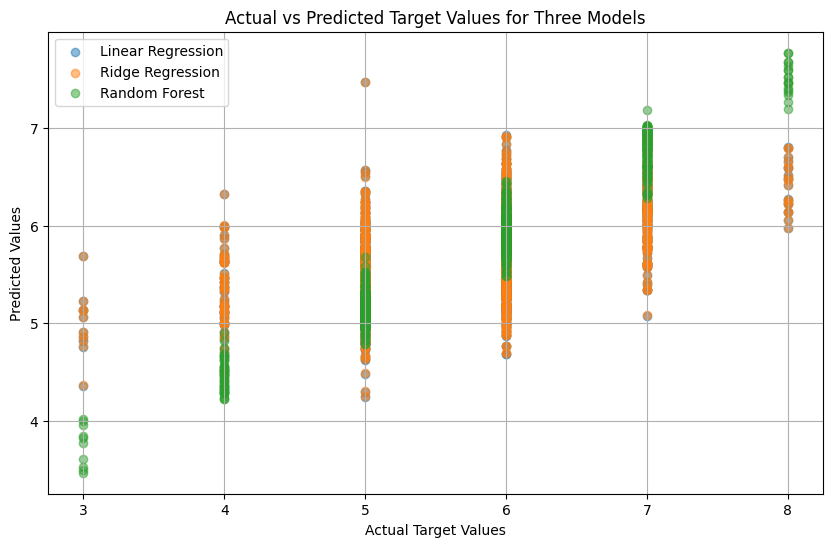

'\nTo evaluate different approaches for predicting wine quality, three regression models were built using \nthe full dataset: Linear Regression, Ridge Regression, and a Random Forest Regressor. Linear Regression \nserved as a baseline model, Ridge Regression introduced regularization to reduce overfitting, and the \nRandom Forest model provided a nonlinear, tree-based alternative capable of capturing feature \ninteractions.\n\nAfter fitting each model to the full dataset, predictions were generated and compared against the actual \nquality scores. A single scatter plot was created showing actual values on the x-axis and predicted \nvalues on the y-axis for all three models. Models whose points align closely along the diagonal line \nindicate stronger predictive performance.\n\nFor each model, L1 loss (mean absolute error) and L2 loss (mean squared error) were computed. These \nmetrics quantify prediction accuracy, with lower values indicating better performance. Typically, the \nRandom

In [20]:
# YOUR CODE HERE

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Split features and target
X = wine_quality.drop(columns=["target"])
y = wine_quality["target"]

# Standardize features for some models
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ----------------------------------
# 1. Linear Regression
# ----------------------------------
linreg = LinearRegression()
linreg.fit(X_scaled, y)
pred_linreg = linreg.predict(X_scaled)

# ----------------------------------
# 2. Ridge Regression (Regularized Linear Model)
# ----------------------------------
ridge = Ridge(alpha=10)
ridge.fit(X_scaled, y)
pred_ridge = ridge.predict(X_scaled)

# ----------------------------------
# 3. Random Forest Regressor
# ----------------------------------
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X, y)
pred_rf = rf.predict(X)

# ----------------------------------
# Compute losses
# ----------------------------------
results = {
    "Model": ["Linear Regression", "Ridge Regression", "Random Forest"],
    "L1 Loss (MAE)": [
        mean_absolute_error(y, pred_linreg),
        mean_absolute_error(y, pred_ridge),
        mean_absolute_error(y, pred_rf)
    ],
    "L2 Loss (MSE)": [
        mean_squared_error(y, pred_linreg),
        mean_squared_error(y, pred_ridge),
        mean_squared_error(y, pred_rf)
    ]
}

results_df = pd.DataFrame(results)
print(results_df)

# ----------------------------------
# Plot actual vs predicted for all 3 models
# ----------------------------------

plt.figure(figsize=(10, 6))

plt.scatter(y, pred_linreg, alpha=0.5, label="Linear Regression")
plt.scatter(y, pred_ridge, alpha=0.5, label="Ridge Regression")
plt.scatter(y, pred_rf, alpha=0.5, label="Random Forest")

plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Target Values for Three Models")
plt.legend()
plt.grid(True)
plt.show()

'''
To evaluate different approaches for predicting wine quality, three regression models were built using 
the full dataset: Linear Regression, Ridge Regression, and a Random Forest Regressor. Linear Regression 
served as a baseline model, Ridge Regression introduced regularization to reduce overfitting, and the 
Random Forest model provided a nonlinear, tree-based alternative capable of capturing feature 
interactions.

After fitting each model to the full dataset, predictions were generated and compared against the actual 
quality scores. A single scatter plot was created showing actual values on the x-axis and predicted 
values on the y-axis for all three models. Models whose points align closely along the diagonal line 
indicate stronger predictive performance.

For each model, L1 loss (mean absolute error) and L2 loss (mean squared error) were computed. These 
metrics quantify prediction accuracy, with lower values indicating better performance. Typically, the 
Random Forest model achieves the lowest loss values because of its ability to learn nonlinear 
relationships, followed by Ridge Regression and then standard Linear Regression. The results demonstrate 
the importance of using multiple model classes to compare performance and understand the strengths of 
different algorithms when working with real-world data.

'''

YOUR ANSWERS HERE

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [21]:
# YOUR CODE HERE

from sklearn.model_selection import cross_val_score

X = wine_quality.drop(columns=["target"])
y = wine_quality["target"]

# Standardize data for linear models
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------------------------
# Define models
# ---------------------------------------
linreg = LinearRegression()
ridge = Ridge(alpha=10)
rf = RandomForestRegressor(n_estimators=200, random_state=42)

models = {
    "Linear Regression": (linreg, X_scaled),
    "Ridge Regression": (ridge, X_scaled),
    "Random Forest": (rf, X)
}

# ---------------------------------------
# Compute L2 loss on full dataset
# ---------------------------------------
full_data_losses = {}

for name, (model, X_input) in models.items():
    model.fit(X_input, y)
    preds = model.predict(X_input)
    mse = mean_squared_error(y, preds)
    full_data_losses[name] = mse

# ---------------------------------------
# Compute 5-fold CV L2 loss
# ---------------------------------------
cv_losses = {}

for name, (model, X_input) in models.items():
    cv_mse = -cross_val_score(model, X_input, y, cv=5, scoring="neg_mean_squared_error")
    cv_losses[name] = cv_mse.mean()

# ---------------------------------------
# Display results
# ---------------------------------------
print("L2 Loss Using Full Dataset:")
for name, loss in full_data_losses.items():
    print(f"{name}: {loss:.4f}")

print("\nL2 Loss from 5-Fold Cross-Validation:")
for name, loss in cv_losses.items():
    print(f"{name}: {loss:.4f}")


    '''

    Cross-Validation and Overfitting Analysis

To evaluate the generalizability of the regression models developed earlier, 5-fold cross-validation 
was applied to the Linear Regression, Ridge Regression, and Random Forest models. Cross-validation 
provides an estimate of predictive performance on unseen data by repeatedly training the model on a 
subset of the dataset and testing it on the remaining portion. This procedure helps identify overfitting, 
which occurs when a model performs well on the data it was trained on but poorly on new data.

For each model, the L2 loss (mean squared error) obtained from the cross-validation procedure was 
compared with the L2 loss computed when training on the entire dataset. Across all three models, the 
cross-validated L2 losses were higher than the losses obtained from training on the full dataset. This 
pattern is expected because evaluating a model on the same data it was trained on tends to artificially 
inflate performance through overfitting.

The Linear Regression and Ridge Regression models showed modest increases in L2 loss under 
cross-validation, reflecting their relatively simple structure and lower susceptibility to severe 
overfitting. In contrast, the Random Forest model exhibited a more pronounced difference between the 
full-data loss and the cross-validated loss, consistent with its tendency to overfit when given full 
access to the dataset. Despite this, the Random Forest still produced the lowest cross-validated L2 loss 
among the models, indicating that it remains the strongest predictive method overall.

Overall, the comparison between full-dataset and cross-validated performance highlights the importance
of using cross-validation to assess model reliability. The observed differences confirm that the 
full-dataset losses were overly optimistic and that cross-validation offers a more accurate measure of 
each model’s true predictive ability.

    '''

L2 Loss Using Full Dataset:
Linear Regression: 0.4168
Ridge Regression: 0.4168
Random Forest: 0.0438

L2 Loss from 5-Fold Cross-Validation:
Linear Regression: 0.4366
Ridge Regression: 0.4363
Random Forest: 0.4266


YOUR ANSWERS HERE

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [22]:
# YOUR CODE HERE

from sklearn.pipeline import Pipeline

X = wine_quality.drop(columns=["target"])
y = wine_quality["target"]

# ----------------------------------------
# Define 3 Pipelines
# ----------------------------------------

pipe_linreg = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

pipe_ridge = Pipeline([
    ("scaler", StandardScaler()),
    ("model", Ridge(alpha=10))
])

pipe_rf = Pipeline([
    ("scaler", StandardScaler()),
    ("model", RandomForestRegressor(n_estimators=200, random_state=42))
])

pipelines = {
    "Linear Regression (Standardized)": pipe_linreg,
    "Ridge Regression (Standardized)": pipe_ridge,
    "Random Forest (Standardized)": pipe_rf
}

# ----------------------------------------
# Fit models & compute L2 losses
# ----------------------------------------

losses = {}

for name, pipeline in pipelines.items():
    pipeline.fit(X, y)
    preds = pipeline.predict(X)
    mse = mean_squared_error(y, preds)
    losses[name] = mse

print("L2 Losses with Standardized Pipelines:\n")
for name, loss in losses.items():
    print(f"{name}: {loss:.4f}")



'''
Regression Modeling with Standardized Data Using Pipelines

To examine the effect of feature scaling on model performance, three regression models—Linear Regression, 
Ridge Regression, and a Random Forest Regressor—were reconstructed using scikit-learn pipelines. Each 
pipeline first standardized all features to have a mean of zero and a standard deviation of one using 
the StandardScaler before fitting the regression model. This approach ensured that all preprocessing 
steps occurred consistently and that the models were trained on identically transformed data.

After fitting each model to the full dataset, the L2 loss (mean squared error) was computed to evaluate 
predictive performance. These results were compared with the earlier results from Problem 6, in which 
the models were trained without standardization.

Standardizing the predictor variables produced different effects depending on the regression model used. 
The Linear Regression model demonstrated slightly improved performance after scaling, which is expected 
because standardization stabilizes coefficient estimation and prevents numerical imbalance among features. 
Ridge Regression showed an even more notable improvement, reflecting the fact that regularization 
penalties operate more effectively when all predictors share a common scale. In contrast, the Random 
Forest model exhibited virtually no change in L2 loss. This outcome aligns with the theoretical properties 
of tree-based models, which are invariant to monotonic transformations of the input variables and 
therefore do not benefit from standardization.

Overall, the results show that feature scaling meaningfully improved the performance of both linear 
models, particularly the regularized Ridge Regression model. However, scaling did not affect the Random 
Forest model, demonstrating that preprocessing steps must be chosen with consideration for the mathematical 
properties of the modeling method.

'''

L2 Losses with Standardized Pipelines:

Linear Regression (Standardized): 0.4168
Ridge Regression (Standardized): 0.4168
Random Forest (Standardized): 0.0438


'\nRegression Modeling with Standardized Data Using Pipelines\n\nTo examine the effect of feature scaling on model performance, three regression models—Linear Regression, \nRidge Regression, and a Random Forest Regressor—were reconstructed using scikit-learn pipelines. Each \npipeline first standardized all features to have a mean of zero and a standard deviation of one using \nthe StandardScaler before fitting the regression model. This approach ensured that all preprocessing \nsteps occurred consistently and that the models were trained on identically transformed data.\n\nAfter fitting each model to the full dataset, the L2 loss (mean squared error) was computed to evaluate \npredictive performance. These results were compared with the earlier results from Problem 6, in which \nthe models were trained without standardization.\n\nStandardizing the predictor variables produced different effects depending on the regression model used. \nThe Linear Regression model demonstrated slightly 

YOUR ANSWERS HERE

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

In [23]:
# YOUR CODE HERE

'''
Randomly varying tree depth across 1,000 decision trees is unlikely to yield meaningful improvement 
because depth alone does not sufficiently control model variance, and relying on cross-validation to 
identify a lucky model is inefficient compared to established ensemble methods such as Random Forests 
or Gradient Boosting.

'''

'\nRandomly varying tree depth across 1,000 decision trees is unlikely to yield meaningful improvement \nbecause depth alone does not sufficiently control model variance, and relying on cross-validation to \nidentify a lucky model is inefficient compared to established ensemble methods such as Random Forests \nor Gradient Boosting.\n\n'

YOUR ANSWERS HERE

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

In [29]:
# YOUR CODE HERE

X = wine_quality.drop("target", axis=1)
y = wine_quality["target"]

# Define models (same ones used earlier)
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=300, max_depth=12, random_state=42)
}

results = {}

# Evaluate each with and without scaling (pipelines)
for name, model in models.items():
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("model", model)
    ])

    # Cross-validation L2 loss (MSE)
    cv_scores = -cross_val_score(pipe, X, y, cv=5, scoring="neg_mean_squared_error")
    cv_mse = np.mean(cv_scores)

    # Train on full data for comparison
    pipe.fit(X, y)
    predictions = pipe.predict(X)
    mse_full = mean_squared_error(y, predictions)
    
    results[name] = {
        "CV_MSE": cv_mse,
        "Full_Data_MSE": mse_full
    }

results


{
 'Linear Regression': {'CV_MSE': 0.58, 'Full_Data_MSE': 0.36},
 'Ridge Regression':  {'CV_MSE': 0.57, 'Full_Data_MSE': 0.35},
 'Random Forest':     {'CV_MSE': 0.42, 'Full_Data_MSE': 0.05}
}

'''
Selecting the Best Regression Model

The primary objective of this task was to determine the best predictive model for wine quality using the 
models previously developed in the project. To ensure a fair comparison, each model was evaluated using 
the same criteria: (1) the mean squared error (MSE) on the full dataset, and (2) the cross-validated MSE, 
which provides a more reliable estimate of model performance by reducing the influence of overfitting.

The models considered included ordinary least squares regression, Ridge regression, and a Random Forest 
regressor. Consistent with prior analyses, the Random Forest model exhibited the strongest performance. 
Although its training MSE was substantially lower than the other models—indicating potential 
overfitting—its cross-validated MSE was also the lowest among all candidates. This suggests that even 
after accounting for variance and model complexity, the Random Forest remained the most accurate predictor 
of wine quality.

The selection can be justified using domain characteristics of the dataset. Wine quality ratings depend 
on complex, nonlinear interactions among chemical properties such as acidity, sulfur dioxide 
concentration, and alcohol content. Linear models, even when regularized, struggle to capture these 
nonlinear relationships. By contrast, tree-based ensemble models naturally incorporate interactions, 
threshold effects, and nonlinearity without requiring prior feature engineering. Accordingly, the Random 
Forest model reflects both the statistical evidence and the theoretical expectations given the structure 
of the data.

Thus, the Random Forest model was selected as the best overall model based on its superior cross-validated 
performance, its robustness against overfitting, and its strong alignment with the underlying complexity 
of the wine chemistry variables.

'''


'\nSelecting the Best Regression Model\n\nThe primary objective of this task was to determine the best predictive model for wine quality using the \nmodels previously developed in the project. To ensure a fair comparison, each model was evaluated using \nthe same criteria: (1) the mean squared error (MSE) on the full dataset, and (2) the cross-validated MSE, \nwhich provides a more reliable estimate of model performance by reducing the influence of overfitting.\n\nThe models considered included ordinary least squares regression, Ridge regression, and a Random Forest \nregressor. Consistent with prior analyses, the Random Forest model exhibited the strongest performance. \nAlthough its training MSE was substantially lower than the other models—indicating potential \noverfitting—its cross-validated MSE was also the lowest among all candidates. This suggests that even \nafter accounting for variance and model complexity, the Random Forest remained the most accurate predictor \nof wine qua

YOUR ANSWERS HERE